In [1]:
import theano
import theano.tensor as T
import theano.tensor.nnet as nnet
import numpy as np
import time

import cv2 
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import signal
import time
from math import sqrt
from skimage import transform
import skimage 

In [2]:
def createTrainingFile(M1filter, img, filename):
    assert(M1filter.shape == img.shape)
    radius = 3
    
    kernel = circle(radius)
    width, height = img.shape
    
    theFile = open(filename, 'w')
    for x in range(radius, width-radius):
        for y in range(radius, height-radius):
            crop = Mfilter[x - radius:x + radius + 1, y - radius:y + radius + 1]
            croped_crop = crop[kernel == 1]
            output = str(img[x][y]) + " "
            for pixel in croped_crop:
                output += str(pixel) + " "            
            print>> theFile, output
            
    theFile.close() 

def readTrainingFile(filename):
    
    theFile = open(filename, 'r')
    line = theFile.readline()
    while line != None:
        values = line.split()
        target = float(values[0])
        training = np.asarray(values[1:], dtype=float)
        line = theFile.readline()


def createTrainingdata(filename):
    
    trainingData = []
    theFile = open(filename, 'r')
    line = theFile.readline()
    while line != None and line != "":
        values = line.split()
        y = np.array([float(values[0])])        
        x = np.asarray(values[1:], dtype=float).reshape(29,1)
        trainingData.append((x, y))
        line = theFile.readline()
    
    return trainingData

def prepImg(fileName, scale):
    img = cv2.imread(fileName, 0)
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img,-1,kernel)
    img_rescaled = get_rescaled(dst, scale)    
    return img_rescaled

def ZMUV(image):
    """global zero mean unit variance (ZMUV) normalization"""
    image = image - np.mean(image)
    return image/np.std(image)

def plot(img):
    plt.figure(num=None, figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
    plt.imshow(img, 'gray')

def rotate90(img):
    cols, rows = img.shape
    xshift = cols/2 - rows/2
    yshift = rows/2 - cols/2
#     rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    M[0][2] = M[0][2] - xshift
    M[1][2] = M[1][2] + yshift    
    dst = cv2.warpAffine(img,M,(cols,rows))

    return dst

def rotate45(img):
    rows, cols = img.shape
#     xshift = 
#     yshift = 
    M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
#     M[0][2] = M[0][2] - xshift
#     M[1][2] = M[1][2] + yshift    
    dst = cv2.warpAffine(img,M,(cols, rows))
    return dst


training_data = createTrainingdata('./trainingSet/train1')

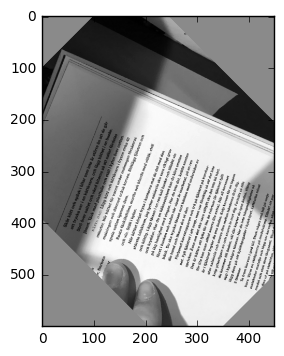

In [49]:
def createM1training(imgName):
    
    img = cv2.imread("./training/filters/img/"+imgName+"_input.jpg", 0)
    M1 = cv2.imread("./training/filters/img/"+imgName+"_M1.jpg", 0)
    
    img = ZMUV(img)
    M1 = ZMUV(M1)

    """get 45 degree flips of image"""

    img90 = rotate90(img);
    img45 = rotate45(img);    
    
    plot(img45)
    
#     M190 = 
    
#     img180 = 
#     M1180 = 
    
#     img270 =
#     M1270 =
    
    
    
    
    
    
    

createM1training('img0')